In [1]:
import pandas as pd
from glob import glob
import os

In [2]:
import datetime

epoch = datetime.datetime.utcfromtimestamp(0)

def unix_time_millis(dt):
    return int((dt - epoch).total_seconds() * 1000.0)

In [3]:
ll = glob(r'D:\Projects\Pr\2505.12\Eduvizig\Sensor series (waterstandsverlopen)/*.csv')

In [4]:
ids = [
    {'no':1,'id_voa':'16495FD9-97AB-11D4-BB62-00508BA24287','hash_id': '-2111640596'},
    {'no':2,'id_voa':'16495FDA-97AB-11D4-BB62-00508BA24287','hash_id': '525712224'  }, # Dunaramete 600
    {'no':3,'id_voa':'16495FDB-97AB-11D4-BB62-00508BA24287','hash_id': '-1758465927'}, # Nagybajcs  600
    {'no':4,'id_voa':'16495FDC-97AB-11D4-BB62-00508BA24287','hash_id': '-1115086056'}, # Gonyu      600
    {'no':5,'id_voa':'16495FDD-97AB-11D4-BB62-00508BA24287','hash_id': '305387222'  }, # Komarom    600
    {'no':6,'id_voa':'16495FDF-97AB-11D4-BB62-00508BA24287','hash_id': '579083965'  }, # Esztergom  600
    {'no':7,'id_voa':'16495FE0-97AB-11D4-BB62-00508BA24287','hash_id': '1763343428' },
    {'no':8,'id_voa':'16495FE1-97AB-11D4-BB62-00508BA24287','hash_id': '2144261354' },
    {'no':9,'id_voa':'16495FE2-97AB-11D4-BB62-00508BA24287','hash_id': '-2078840135'},
    {'no':10,'id_voa':'16495FE3-97AB-11D4-BB62-00508BA24287','hash_id':'-1075038543'},
    {'no':11,'id_voa':'16495FE8-97AB-11D4-BB62-00508BA24287','hash_id':'-1313710027'},
    {'no':12,'id_voa':'16495FE9-97AB-11D4-BB62-00508BA24287','hash_id':'-321135123' },
    {'no':13,'id_voa':'16495FEB-97AB-11D4-BB62-00508BA24287','hash_id':'-1108028420'},
    {'no':14,'id_voa':'16495FF5-97AB-11D4-BB62-00508BA24287','hash_id':'-461452563' },
    {'no':15,'id_voa':'16495FF7-97AB-11D4-BB62-00508BA24287','hash_id':'-262573935' },
    {'no':16,'id_voa':'16495FFA-97AB-11D4-BB62-00508BA24287','hash_id':'780604148'  },
    {'no':17,'id_voa':'16495FFC-97AB-11D4-BB62-00508BA24287','hash_id':'849008159'  },
    {'no':18,'id_voa':'16496010-97AB-11D4-BB62-00508BA24287','hash_id':'1871916064' },
    {'no':19,'id_voa':'16496011-97AB-11D4-BB62-00508BA24287','hash_id':'1483076295' },
    {'no':20,'id_voa':'16496013-97AB-11D4-BB62-00508BA24287','hash_id':'-1940537054'},
    {'no':21,'id_voa':'16496015-97AB-11D4-BB62-00508BA24287','hash_id':'1694437270' },
    {'no':22,'id_voa':'1649601A-97AB-11D4-BB62-00508BA24287','hash_id':'484169733'  },
    {'no':23,'id_voa':'4F469E50-AC92-4D09-AE92-2DCA1D170882','hash_id':'489252426'  },
    {'no':24,'id_voa':'73F7E3D6-985C-11D4-BB62-00508BA24287','hash_id':'421184431'  }, # Doborgaz   950
    {'no':25,'id_voa':'CD45857E-BE4D-492F-B39D-63234576ACC7','hash_id':'1109561636' },
    {'no':26,'id_voa':'EF1503B4-13FA-4319-A513-34F6800176F6','hash_id':'28306246'   }
]
lookup = pd.DataFrame(ids)

In [5]:
start = pd.Timestamp('2013-01-02 07:00:00')
end = pd.Timestamp('2013-12-31 07:00:00')
rng = pd.date_range(start, end, freq='1H')

df_all = pd.DataFrame()
for l in ll:
    
    id_l = os.path.basename(l).split('_')[2].split('.')[0]
    df = pd.read_csv(l, skiprows=4, sep='\t', encoding='ISO-8859-2')
    df.index = pd.to_datetime(df.index)
    df = df.iloc[:,0:1]
    df.columns=['waterlevel']
    # print(id_l)
    station_id = lookup[lookup['id_voa'] == id_l]['no'].iloc[0]
    # print(station_id)
    df = df.loc['2013']
    df = df.loc[~df.index.duplicated(keep='first')]
    df = df.reindex(rng, axis=0).interpolate(axis=0)
    df = df.loc['2013-04-01':'2013-09-30']
    df['measuringstation'] = int(station_id)
    df['scenarioid'] = 1    
    if df.isnull().sum().sum() != 0:
        df = df.fillna(0)
    #print(id_l)
    if id_l in ['16495FDA-97AB-11D4-BB62-00508BA24287', '16495FDB-97AB-11D4-BB62-00508BA24287', '16495FDC-97AB-11D4-BB62-00508BA24287', '16495FDD-97AB-11D4-BB62-00508BA24287', '16495FDF-97AB-11D4-BB62-00508BA24287']:
        df.loc[df['waterlevel'] > 600, 'waterlevel'] = 600
    elif id_l in ['73F7E3D6-985C-11D4-BB62-00508BA24287']:
        df.loc[df['waterlevel'] > 950, 'waterlevel'] = 950
        y = df
#     df.reset_index(inplace=True)
#     df['index'] = df['index'].apply(lambda x: unix_time_millis(x))
#     df.rename(columns={'index':'datetime'}, inplace=True)
    df_all = pd.concat((df_all, df))
    #print(df.index[0], df.index[-1])
df_all.measuringstation = df_all.measuringstation.astype(str)

In [6]:
%matplotlib inline

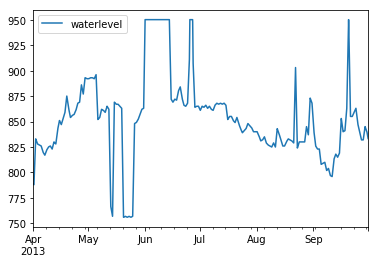

In [7]:
y.plot(y='waterlevel')

In [8]:
df_all.waterlevel.max()

1957.0

In [9]:
df_all.waterlevel = df_all.waterlevel / 100

In [10]:
df_all.waterlevel.max()

19.57

In [11]:
df_all.to_csv(r'D:\Projects\Pr\2505.12\Eduvizig\waterlevels_reservoir_closed.csv')

In [12]:
df_all.head()

,waterlevel,measuringstation,scenarioid
2013-04-01 00:00:00,0.2532,1,1
2013-04-01 01:00:00,0.2528,1,1
2013-04-01 02:00:00,0.2524,1,1
2013-04-01 03:00:00,0.2520,1,1
2013-04-01 04:00:00,0.2516,1,1
